<a href="https://colab.research.google.com/github/neillinehan/NeilLinehanPortfolio/blob/main/Physics%20Models/L4worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
bvs = pd.read_excel('/content/HallDat-3-1.xlsx',sheet_name=1,skiprows=3)

In [ ]:
!pip install scienceplots

In [ ]:
import scienceplots

In [ ]:
plt.style.use(['science','notebook'])

<Axes: xlabel='I (A)', ylabel='B (kG)'>

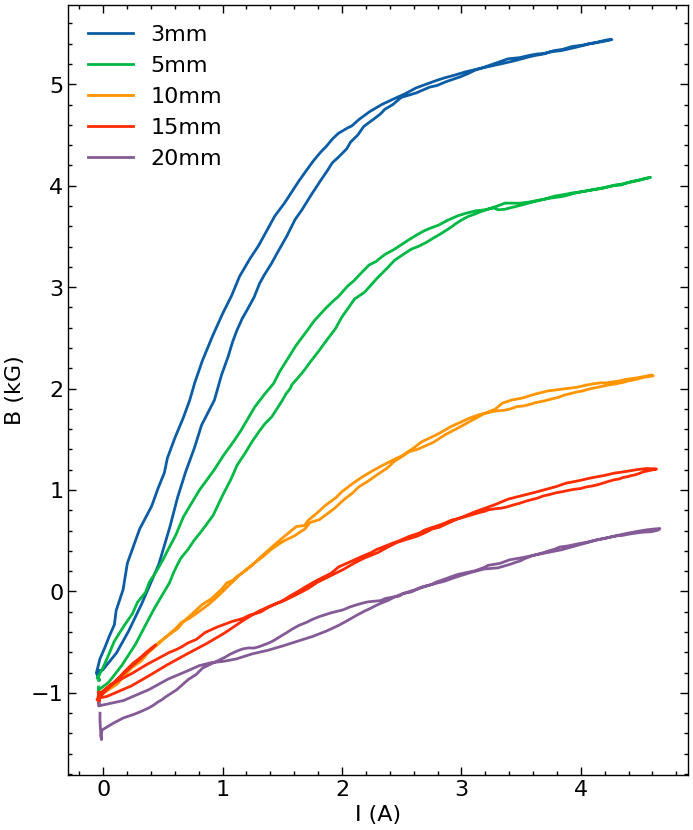

In [ ]:
fig, ax = plt.subplots(figsize=(8,10))
bvs.plot(x='I(A)',y='3mm',ax=ax)
bvs.plot(x='I(A).1',y='5mm',ax=ax)
bvs.plot(x='I(A).2',y='10mm',ax=ax)
bvs.plot(x='I(A).3',y='15mm',ax=ax)
bvs.plot(x='I(A).4',y='20mm',ax=ax,xlabel='I (A)',ylabel='B (kG)')

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlim'

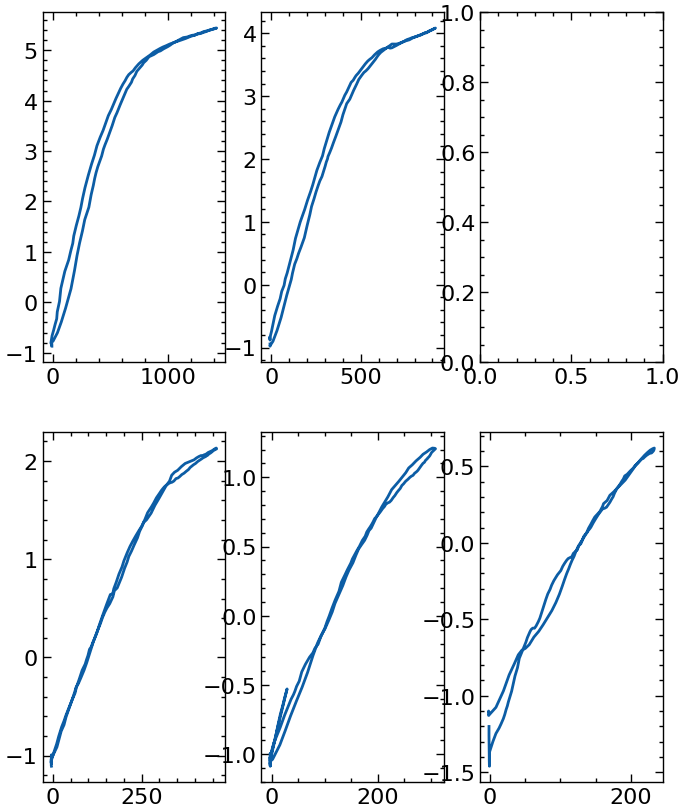

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(8,10))
ax[0,0].plot(bvs['I(A)']/3/10**-3,bvs['3mm'])
ax[0,1].plot(bvs['I(A).1']/5/10**-3,bvs['5mm'])
ax[1,0].plot(bvs['I(A).2']/10/10**-3,bvs['10mm'])
ax[1,1].plot(bvs['I(A).3']/15/10**-3,bvs['15mm'])
ax[1,2].plot(bvs['I(A).4']/20/10**-3,bvs['20mm'])
ax.set_xlim(0,150)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


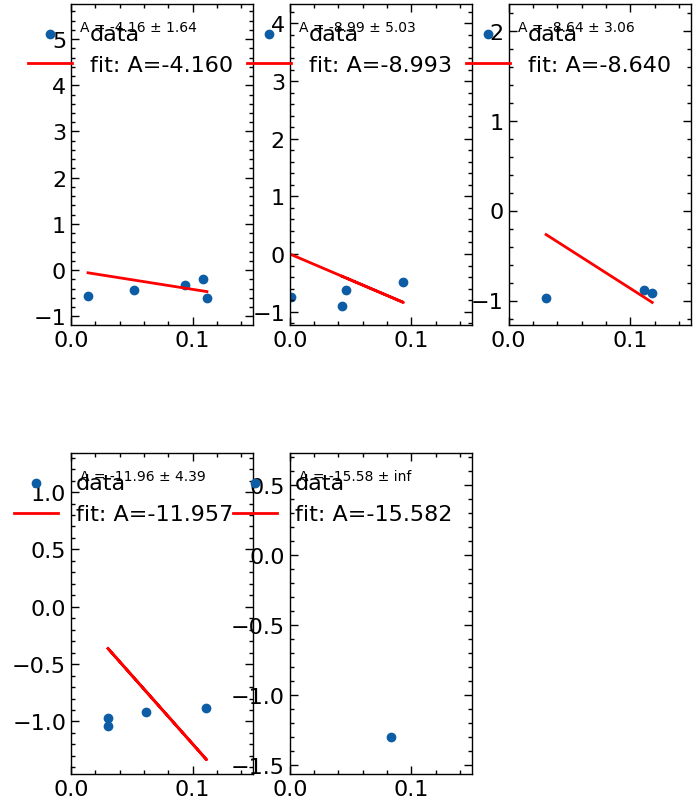

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Define the function for the linear fit
def func(I, A):
    return A* I

# Create a figure with a specific layout
fig = plt.figure(figsize=(8, 10))

# Create subplots
ax = [fig.add_subplot(2, 3, i+1) for i in range(5)]

# Remove the unused subplot
#fig.delaxes(fig.axes[5])

# Adjust the position of the subplots on the second row to be centered
plt.subplots_adjust(hspace=0.4)

# List of data
data = [('I(A)', '3mm', 3), ('I(A).1', '5mm', 5), ('I(A).2', '10mm', 10), ('I(A).3', '15mm', 15), ('I(A).4', '20mm', 20)]

for i, (current, voltage, divisor) in enumerate(data):
    I = bvs[current]
    B = bvs[voltage]

    # Restrict the fit range to I [0-.15]
    mask = (I >= 0) & (I <= 0.15)
    I_fit = I[mask]
    B_fit = B[mask]

    # Perform the fit
    popt, pcov = curve_fit(func, I_fit, B_fit)

    # Calculate the uncertainties in the fit parameters
    perr = np.sqrt(np.diag(pcov))

    # Plot the data and the fit
    ax[i].plot(I, B, 'b-', label='data')
    ax[i].plot(I_fit, func(I_fit, *popt), 'r-', label='fit: A=%5.3f' % tuple(popt))

    # Print the fit results with uncertainty included
    ax[i].text(0.05, 0.95, 'A = %0.2f ± %0.2f\n' % (popt[0], perr[0]), transform=ax[i].transAxes, verticalalignment='top')

    #ax[i].set_xlim(0, 150)
    ax[i].legend()
    ax[i].set_xlim(0,.15)
plt.show()


In [ ]:
import numpy as np

# List of columns
columns = ['I(A)', 'I(A).1', 'I(A).2', 'I(A).3', 'I(A).4']

# Create an empty list to store the common values
common_values = []

# Iterate over the values in the first column
for value in bvs[columns[0]]:
    # Check if this value is close to a value in all other columns
    if all(any(np.isclose(value, bvs[col],0.0000001,0.007)) for col in columns[1:]):
        # If it is, add it to the list of common values
        common_values.append(value)

# Print the common values
print(common_values)


[-0.03526, -0.03824, -0.03712, -0.03899, -0.03899, -0.03824, -0.0375, 1.215, 1.31, 1.409, 3.688, 1.302, -0.04011, -0.04086, -0.03862, -0.04235, -0.0416, -0.04048, -0.04123, -0.03936, -0.04086, -0.04123, -0.03153]


In [ ]:
import numpy as np

# List of columns
columns = ['I(A)', 'I(A).1', 'I(A).2', 'I(A).3', 'I(A).4']

# Create an empty list to store the common values
common_values = []

# Define the initial tolerances
rtol = 1e-3
atol = 0.005

# Start a loop to gradually increase the tolerances
while not common_values:
    # Iterate over the values in the first column
    for value in bvs[columns[0]]:
        # Check if this value is close to a value in all other columns
        if all(any(np.isclose(value, bvs[col], rtol, atol)) for col in columns[1:]):
            # If it is, add it to the list of common values
            common_values.append(value)

    # If no common value is found, increase the tolerances
    if not common_values:
        rtol *= 10
        atol *= 10

# Print the common values
print(common_values)


[-0.03526, -0.03824, -0.03712, -0.03899, -0.03899, -0.03824, -0.0375, 3.115, 3.688, -0.04011, -0.04086, -0.03862, -0.04235, -0.0416, -0.04048, -0.04123, -0.03936, -0.04086, -0.04123]


In [ ]:
import numpy as np

# List of columns
columns = ['I(A)', 'I(A).1', 'I(A).2', 'I(A).3', 'I(A).4']

# Create an empty list to store the common values
common_values = []

# Define the initial tolerances
rtol = 1e-7
atol = 0.00001

# Start a loop to gradually increase the tolerances
while not common_values:
    # Iterate over the values in the first column
    for value in bvs[columns[0]]:
        # Check if this value is greater than 0 and close to a value in all other columns
        if value > 0 and all(any(np.isclose(value, bvs[col], rtol, atol)) for col in columns[1:]):
            # If it is, add it to the list of common values
            common_values.append(value)

    # If no common value is found, increase the tolerances
    if not common_values:
        rtol *= 10
        atol *= 10
        print(atol)
        print(rtol)

# Print the common values
print(common_values)


0.0001
1e-06
0.001
9.999999999999999e-06
0.01
9.999999999999999e-05
[0.5593, 0.6235, 1.215, 1.31, 1.409, 2.181, 3.115, 3.201, 3.688, 3.282, 3.201, 1.702, 1.302, 0.1667]


In [ ]:
# Your target value
target = 0.5593

# Tolerance
tolerance = 0.00001  # adjust this value as needed

# List of columns
columns = ['I(A)', 'I(A).1', 'I(A).2', 'I(A).3', 'I(A).4']

# Create an empty DataFrame to store the selected records
selected_records = pd.DataFrame()

# Iterate over the columns
for col in columns:
    # Select the records where the current is close to the target value
    mask = np.isclose(bvs[col], target,rtol=rtol, atol=atol)
    selected_records = selected_records.append(bvs[mask])

# Print the selected records
print(selected_records)


        I(A)     3mm  I(A).1      5mm  I(A).2    10mm   I(A).3    15mm  \
12   0.55930  0.6382  0.4917 -0.04105  0.3178 -0.6874  1.01900 -0.4087   
13   0.62350  0.9280  0.5552  0.08495  0.3757 -0.6057  1.17400 -0.2852   
137 -0.04048 -0.8513  0.4988  0.30700  0.5686 -0.4126 -0.03936 -1.0260   
122  0.40550  0.8391  1.6150  2.42400  1.4150  0.4397  0.55180 -0.6029   
143      NaN     NaN  0.1741 -0.34020  0.1700 -0.8027  0.17000 -0.8027   

     I(A).4    20mm  
12   0.9056 -0.7024  
13   1.0030 -0.6907  
137  0.9101 -0.7117  
122  1.6410 -0.3341  
143  0.5660 -1.0080  


<ipython-input-114-2390541fb1cf>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_records = selected_records.append(bvs[mask])
<ipython-input-114-2390541fb1cf>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_records = selected_records.append(bvs[mask])
<ipython-input-114-2390541fb1cf>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_records = selected_records.append(bvs[mask])
<ipython-input-114-2390541fb1cf>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_records = selected_records.append(bvs[mask])
<ipython-input-114-2390541fb1cf>:17: FutureWarning: The frame.append method is deprecated and wi

In [ ]:
0.6382
0.08495
 -0.4126
-0.6029
-1.0080

2.795

In [ ]:
i_Ge = pd.read_excel('/content/HallDat-3-1.xlsx',sheet_name=2,skiprows=2)

In [ ]:
i_Ge['ln(T)'] = np.log(i_Ge['T(C)'])

In [ ]:
i_Ge['ln(VSamp(V))'] = np.log(i_Ge['VSamp(V)'])

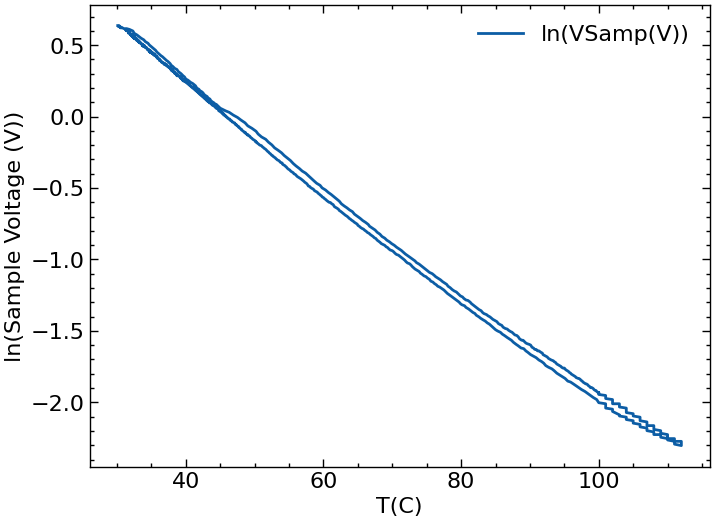

In [ ]:
ax = i_Ge.plot(x='T(C)',y='ln(VSamp(V))',ylabel='ln(Sample Voltage (V))',)


In [ ]:
i_Ge[['ln(VSamp(V))','T(C)']]

,ln(VSamp(V)),T(C)
0,0.636577,30.1
1,0.636577,30.1
2,0.636577,30.2
3,0.636577,30.3
4,0.631272,30.3
...,...,...
3595,0.609766,31.3
3596,0.609766,31.4
3597,0.609766,31.3
3598,0.604316,31.3


In [ ]:
p_Ge_B = pd.read_excel('/content/HallDat-3-1.xlsx',sheet_name=5,skiprows=2)
n_Ge_B = pd.read_excel('/content/HallDat-3-1.xlsx',sheet_name=4,skiprows=2)

In [ ]:
#Hall voltage vs B-field for all three samples

,t (sec),T(C),VSamp(V),Hall (mV),SampI(mA),Ib (A),B(kG)
0,0.0,29.6,1.26,2.84,29.9,0.006520,-0.1560
1,0.5,29.7,1.26,2.77,29.9,0.000922,-0.1575
2,1.0,29.7,1.26,2.77,29.9,0.003910,-0.1560
3,1.5,29.7,1.26,2.68,29.9,0.003160,-0.1575
4,2.0,29.7,1.26,-19.60,29.9,-0.670000,0.3540
...,...,...,...,...,...,...,...
73,36.5,30.3,1.26,2.84,29.9,0.002040,-0.1575
74,37.0,30.3,1.26,2.81,29.9,0.006520,-0.1560
75,37.5,30.3,1.26,2.68,29.9,0.010600,-0.1560
76,38.0,30.3,1.26,2.71,29.9,0.006890,-0.1575


<Axes: xlabel='Hall (mV)', ylabel='B (kG)'>

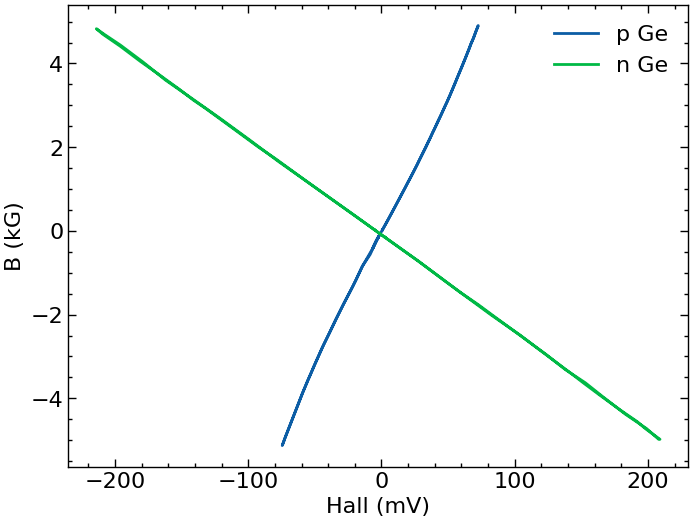

In [ ]:
ax = p_Ge_B.plot(x='Hall (mV)',y='B(kG)',label='p Ge')
n_Ge_B.plot(x='Hall (mV)',y='B(kG)',ax=ax,label='n Ge',ylabel='B (kG)',)

In [ ]:
#Plot Hall voltage vs T for p-Ge

In [ ]:
p_Ge_T = pd.read_excel('/content/HallDat-3-1.xlsx',sheet_name=3,skiprows=3)

<Axes: xlabel='Temp (C_)', ylabel='Hall Voltage (mV)'>

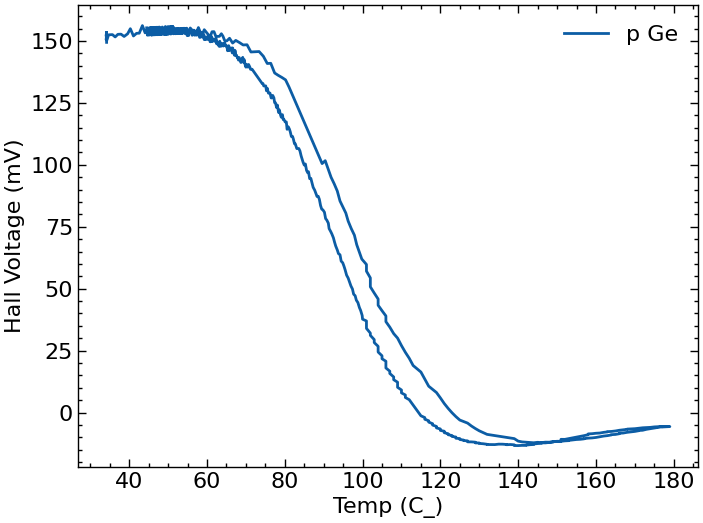

In [ ]:
p_Ge_T.plot(y='Hall (mV)',x='Temp (C_)',label='p Ge',ylabel='Hall Voltage (mV)')

In [ ]:
p_Ge_T

,Time (sec),Temp (C_),Hall (mV)
0,14,34.2,149.4728
1,15,34.2,149.4728
2,16,34.2,151.4728
3,17,34.2,152.4728
4,18,34.2,151.4728
...,...,...,...
655,713,44.7,153.3548
656,714,44.7,152.3548
657,715,44.6,154.3464
658,716,44.5,153.3380


In [ ]:
#Find the mobility mp for p-Ge from the magneto-resistance behavior (Eq 2.6). Hint: Dr/r = DV/V, so you can fit (V(B)- V(0))/V(0) vs B; V is sample voltage.

In [ ]:
p_Ge_T = pd.read_excel('/content/HallDat-3-1.xlsx',sheet_name=6,skiprows=2)

In [ ]:
V0 = 1.318
DV_V = (V0 - p_Ge_T['VSamp(V)'])/V0

0     0.038730
1     0.038888
2     0.103942
3     0.659506
4     1.705636
        ...   
88    0.002958
89    0.002958
90    0.002998
91    0.002998
92    0.002920
Name: B(kG), Length: 93, dtype: float64

In [ ]:
DV_V.index = p_Ge_T['B(kG)']

In [ ]:
p_Ge_T['VSamp(V)'].index = p_Ge_T['B(kG)']

In [ ]:
p_Ge_T['VSamp(V)'].to_frame()

,VSamp(V)
B(kG),
0.19680,1.318
0.19720,1.318
0.32240,1.319
0.81210,1.321
1.30600,1.326
...,...
0.05439,1.319
0.05439,1.319
0.05475,1.319


In [ ]:
p_Ge_B['T(C)']

0      300.25
1      300.25
2      300.25
3      300.35
4      300.25
        ...  
167    300.45
168    300.35
169    300.45
170    300.35
171    300.35
Name: T(C), Length: 172, dtype: float64